In [4]:
import simpy
import random

# Define a node entity
class Node:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.proposed_value = None
        self.accepted_value = None
        self.accepted_round = -1

    def send_prepare(self, destination, round):
        # Simulate sending a prepare message
        yield self.env.timeout(random.uniform(0.5, 1.5))
        message = {'type': 'prepare', 'round': round}
        destination.receive_message(self, message)

    def send_accept(self, destination, round, value):
        # Simulate sending an accept message
        yield self.env.timeout(random.uniform(0.5, 1.5))
        message = {'type': 'accept', 'round': round, 'value': value}
        destination.receive_message(self, message)

    def receive_message(self, sender, message):
        # Simulate message receiving
        yield self.env.timeout(random.uniform(0.1, 0.3))
        if message['type'] == 'prepare':
            self.process_prepare(sender, message)
        elif message['type'] == 'accept':
            self.process_accept(sender, message)

    def process_prepare(self, sender, message):
        if message['round'] > self.accepted_round:
            # Send a promise message
            response = {'type': 'promise', 'round': message['round'], 'value': self.accepted_value}
            sender.receive_message(self, response)

    def process_accept(self, sender, message):
        if message['round'] >= self.accepted_round:
            self.accepted_round = message['round']
            self.accepted_value = message['value']

# SimPy simulation environment
env = simpy.Environment()

# Create nodes
nodes = [Node(env, i) for i in range(5)]

# Simulate Paxos rounds
def run_paxos_round():
    round_num = 1  # Start with round 1
    while True:
        for node in nodes:
            # Phase 1: Prepare
            node.send_prepare(random.choice(nodes), round_num)

        yield env.timeout(2)  # Wait for some time

        # Phase 2: Accept
        majority_value = None
        for node in nodes:
            if node.accepted_round == round_num:
                if majority_value is None:
                    majority_value = node.accepted_value
                elif node.accepted_value != majority_value:
                    # In a real Paxos implementation, you'd handle conflicts here
                    pass
            node.send_accept(random.choice(nodes), round_num, majority_value)

        yield env.timeout(2)  # Wait for some time

        round_num += 1

# Schedule events and run the simulation
env.process(run_paxos_round())
env.run(until=100)  # Run the simulation for 100 time units
print('Done!')

Done!


In [5]:
import simpy
import random

# Define a node entity
class Node:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id

    def mine_block(self):
        # Simulate mining a block
        yield self.env.timeout(random.uniform(1, 10))
        # Add the mined block to the blockchain

# SimPy simulation environment
env = simpy.Environment()

# Create nodes
nodes = [Node(env, i) for i in range(5)]

# Simulate PoW mining
def run_pow_mining():
    while True:
        for node in nodes:
            node.mine_block()
        
        yield env.timeout(20)  # Adjust mining time interval

# Schedule events and run the simulation
env.process(run_pow_mining())
env.run(until=100)  # Run the simulation for 100 time units


In [6]:
import simpy
import random

# Define a node entity
class Node:
    def __init__(self, env, node_id, stake):
        self.env = env
        self.node_id = node_id
        self.stake = stake

    def propose_block(self):
        # Simulate proposing a block based on stake
        yield self.env.timeout(random.uniform(0.1, 1))
        # Add the proposed block to the blockchain

# SimPy simulation environment
env = simpy.Environment()

# Create nodes with different stakes
nodes = [Node(env, i, random.uniform(1, 10)) for i in range(5)]

# Simulate PoS block proposal
def run_pos_block_proposal():
    while True:
        for node in nodes:
            node.propose_block()
        
        yield env.timeout(5)  # Adjust block proposal interval

# Schedule events and run the simulation
env.process(run_pos_block_proposal())
env.run(until=100)  # Run the simulation for 100 time units


In [7]:
import simpy
import random

# Define a node entity
class Node:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id

    def produce_block(self):
        # Simulate block production
        yield self.env.timeout(random.uniform(0.5, 2))
        # Add the produced block to the blockchain

# SimPy simulation environment
env = simpy.Environment()

# Create nodes representing block producers
nodes = [Node(env, i) for i in range(21)]  # Example with 21 block producers

# Simulate DPoS block production
def run_dpos_block_production():
    while True:
        # Simulate a round of block production where a subset of nodes produce blocks
        producers = random.sample(nodes, 3)  # 3 block producers per round
        for producer in producers:
            producer.produce_block()
        
        yield env.timeout(10)  # Adjust block production round interval

# Schedule events and run the simulation
env.process(run_dpos_block_production())
env.run(until=100)  # Run the simulation for 100 time units


In [8]:
import simpy
import random
import matplotlib.pyplot as plt

# ... (SimPy PoW simulation code, as previously provided)

# Initialize lists to store simulation results
block_times = []

# SimPy simulation environment
env = simpy.Environment()

# Create nodes
nodes = [Node(env, i) for i in range(5)]

# Simulate PoW mining and record block times
def run_pow_mining():
    while True:
        for node in nodes:
            yield node.mine_block()
            block_times.append(env.now)
        
        yield env.timeout(20)  # Adjust mining time interval

# Schedule events and run the simulation
env.process(run_pow_mining())
env.run(until=100)  # Run the simulation for 100 time units

# Visualize block creation times as a histogram
plt.hist(block_times, bins=20, edgecolor='black')
plt.xlabel('Block Creation Time')
plt.ylabel('Frequency')
plt.title('PoW Simulation: Block Creation Times')
plt.show()


AttributeError: 'Node' object has no attribute 'mine_block'

In [9]:
import simpy
import random
import matplotlib.pyplot as plt

# ... (SimPy PoS simulation code, as previously provided)

# Initialize lists to store simulation results
block_proposal_times = []

# SimPy simulation environment
env = simpy.Environment()

# Create nodes with different stakes
nodes = [Node(env, i, random.uniform(1, 10)) for i in range(5)]

# Simulate PoS block proposal and record proposal times
def run_pos_block_proposal():
    while True:
        for node in nodes:
            yield node.propose_block()
            block_proposal_times.append(env.now)
        
        yield env.timeout(5)  # Adjust block proposal interval

# Schedule events and run the simulation
env.process(run_pos_block_proposal())
env.run(until=100)  # Run the simulation for 100 time units

# Visualize block proposal times as a histogram
plt.hist(block_proposal_times, bins=20, edgecolor='black')
plt.xlabel('Block Proposal Time')
plt.ylabel('Frequency')
plt.title('PoS Simulation: Block Proposal Times')
plt.show()


TypeError: Node.__init__() takes 3 positional arguments but 4 were given

In [10]:
import simpy
import random
import matplotlib.pyplot as plt

# ... (SimPy DPoS simulation code, as previously provided)

# Initialize lists to store simulation results
block_production_times = []

# SimPy simulation environment
env = simpy.Environment()

# Create nodes representing block producers
nodes = [Node(env, i) for i in range(21)]  # Example with 21 block producers

# Simulate DPoS block production and record production times
def run_dpos_block_production():
    while True:
        # Simulate a round of block production where a subset of nodes produce blocks
        producers = random.sample(nodes, 3)  # 3 block producers per round
        for producer in producers:
            yield producer.produce_block()
            block_production_times.append(env.now)
        
        yield env.timeout(10)  # Adjust block production round interval

# Schedule events and run the simulation
env.process(run_dpos_block_production())
env.run(until=100)  # Run the simulation for 100 time units

# Visualize block production times as a histogram
plt.hist(block_production_times, bins=20, edgecolor='black')
plt.xlabel('Block Production Time')
plt.ylabel('Frequency')
plt.title('DPoS Simulation: Block Production Times')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Arafat\\AppData\\Local\\Temp\\ipykernel_22124\\2319280729.py'

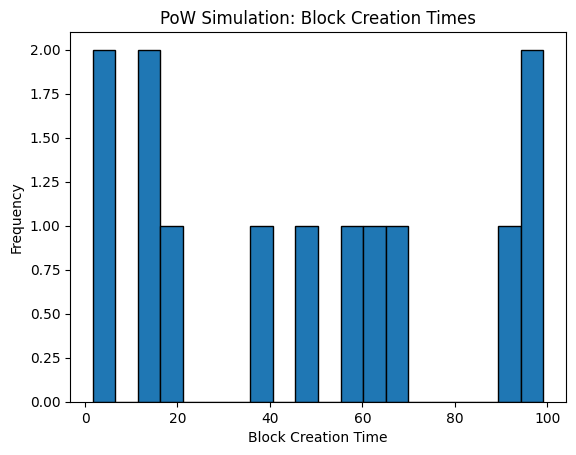

In [11]:
import simpy
import random
import matplotlib.pyplot as plt

# Define a node entity
class Node:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id

    def mine_block(self):
        # Simulate mining a block
        yield self.env.timeout(random.uniform(1, 10))
        # Add the mined block to the blockchain

# ... (SimPy PoW simulation code, as previously provided)

# Initialize lists to store simulation results
block_times = []

# SimPy simulation environment
env = simpy.Environment()

# Create nodes
nodes = [Node(env, i) for i in range(5)]

# Simulate PoW mining and record block times
def run_pow_mining():
    while True:
        for node in nodes:
            yield env.process(node.mine_block())
            block_times.append(env.now)
        
        yield env.timeout(20)  # Adjust mining time interval

# Schedule events and run the simulation
env.process(run_pow_mining())
env.run(until=100)  # Run the simulation for 100 time units

# Visualize block creation times as a histogram
plt.hist(block_times, bins=20, edgecolor='black')
plt.xlabel('Block Creation Time')
plt.ylabel('Frequency')
plt.title('PoW Simulation: Block Creation Times')
plt.show()


In [12]:
import simpy
import random

# Define a node entity for PoW, PoS, and DPoS
class Node:
    def __init__(self, env, node_id):
        self.env = env
        self.node_id = node_id
        self.blocks = []

    def mine_block(self):
        # Simulate block mining
        yield self.env.timeout(random.uniform(1, 10))
        self.blocks.append(self.env.now)

    def propose_block(self):
        # Simulate block proposal
        yield self.env.timeout(random.uniform(0.1, 1))
        self.blocks.append(self.env.now)

# SimPy simulation environment
env = simpy.Environment()

# Create nodes for PoW, PoS, and DPoS simulations
nodes_pow = [Node(env, i) for i in range(5)]
nodes_pos = [Node(env, i) for i in range(5)]
nodes_dpos = [Node(env, i) for i in range(21)]  # Example with 21 nodes

# Lists to store simulation results
latency_pow = []
latency_pos = []
latency_dpos = []

throughput_pow = []
throughput_pos = []
throughput_dpos = []

blocks_pow = []
blocks_pos = []
blocks_dpos = []

# Simulate PoW, PoS, and DPoS consensus algorithms
def run_pow_pos_dpos():
    while True:
        for node in nodes_pow:
            yield env.process(node.mine_block())
        for node in nodes_pos:
            yield env.process(node.propose_block())
        for node in nodes_dpos:
            yield env.process(node.propose_block())
        
        # Record latency, throughput, and block-related metrics
        # (Please adjust these metrics according to your research goals)
        latency_pow.append(calculate_latency(nodes_pow))
        latency_pos.append(calculate_latency(nodes_pos))
        latency_dpos.append(calculate_latency(nodes_dpos))
        
        throughput_pow.append(calculate_throughput(nodes_pow))
        throughput_pos.append(calculate_throughput(nodes_pos))
        throughput_dpos.append(calculate_throughput(nodes_dpos))
        
        blocks_pow.append(len(nodes_pow[0].blocks))
        blocks_pos.append(len(nodes_pos[0].blocks))
        blocks_dpos.append(len(nodes_dpos[0].blocks))
        
        yield env.timeout(100)  # Adjust simulation duration

def calculate_latency(nodes):
    # Calculate latency metric for a set of nodes
    # (You may need to implement this function based on your specific metric)
    return ...

def calculate_throughput(nodes):
    # Calculate throughput metric for a set of nodes
    # (You may need to implement this function based on your specific metric)
    return ...

# Schedule events and run the simulation
env.process(run_pow_pos_dpos())
env.run(until=1000)  # Adjust the simulation duration as needed


TypeError: float() argument must be a string or a real number, not 'ellipsis'

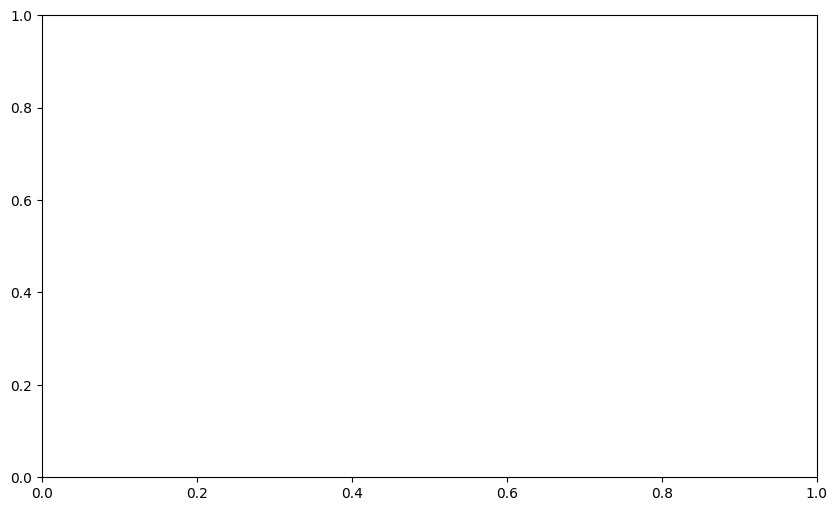

In [13]:
import matplotlib.pyplot as plt

# Visualize latency
plt.figure(figsize=(10, 6))
plt.plot(latency_pow, label='PoW')
plt.plot(latency_pos, label='PoS')
plt.plot(latency_dpos, label='DPoS')
plt.xlabel('Simulation Time')
plt.ylabel('Latency')
plt.legend()
plt.title('Consensus Algorithm Latency Comparison')
plt.grid(True)
plt.show()


In [14]:
import simpy
import hashlib
import random

# SimPy environment
env = simpy.Environment()

# Define the blockchain
class Blockchain:
    def __init__(self, env):
        self.env = env
        self.chain = []  # The blockchain
        self.difficulty = 4  # Proof of Work difficulty
        self.mining_reward = 100  # Reward for mining a new block
        self.pending_transactions = []  # Unconfirmed transactions

    def add_genesis_block(self):
        # Add a genesis block to start the blockchain
        block = Block(0, "0")
        self.chain.append(block)

    def add_block(self, block):
        # Add a new block to the blockchain
        self.chain.append(block)

    def proof_of_work(self, block):
        # Find a nonce that, when hashed with the previous block's hash, meets the difficulty criteria
        while True:
            block.nonce = random.randint(0, 1000000)
            hashed_block = block.calculate_hash()
            if hashed_block[:self.difficulty] == "0" * self.difficulty:
                return hashed_block

    def mine_block(self, miner):
        # Simulate block mining
        block = Block(len(self.chain), self.chain[-1].hash)
        block.timestamp = self.env.now
        block.miner = miner

        # Perform Proof of Work
        block_hash = self.proof_of_work(block)
        block.hash = block_hash

        # Reward the miner
        miner.balance += self.mining_reward

        # Add the block to the chain
        self.add_block(block)

# Define the Block class
class Block:
    def __init__(self, index, previous_hash):
        self.index = index
        self.previous_hash = previous_hash
        self.timestamp = None
        self.nonce = None
        self.hash = None
        self.miner = None

    def calculate_hash(self):
        # Create a string representation of the block's data
        data = f'{self.index}{self.previous_hash}{self.timestamp}{self.nonce}{self.miner}'
        
        # Calculate the SHA-256 hash
        sha256 = hashlib.sha256()
        sha256.update(data.encode('utf-8'))
        return sha256.hexdigest()

# Define a simple Miner class
class Miner:
    def __init__(self, env, blockchain):
        self.env = env
        self.blockchain = blockchain
        self.balance = 0

    def mine(self):
        while True:
            # Simulate mining
            yield self.env.timeout(1)
            self.blockchain.mine_block(self)

# Initialize the blockchain and add a genesis block
blockchain = Blockchain(env)
blockchain.add_genesis_block()

# Create a miner
miner = Miner(env, blockchain)

# Run the simulation for a certain duration
env.run(until=10)  # Simulate for 10 time units
